# **Iris Flower Classification**

In [33]:
# Import required libraries
import pandas as pd # for data loading and manipulation
from sklearn.model_selection import train_test_split # dividing the dataset into training and test data
from sklearn.preprocessing import LabelEncoder # convets categorical columns into numerical one
from sklearn.ensemble import RandomForestClassifier # ensemble decision tree model for better accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # evaluation of the model's performance
import seaborn as sns # for statistical graphs
import matplotlib.pyplot as plt # for basic plots

In [34]:
# Step 1: Load the data
df = pd.read_csv(r"C:\Users\comp\Downloads\IRIS (1).csv", encoding = 'latin1')

In [35]:
# Step 2: Inspect the data
print("First 5 rows of the dataset:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

First 5 rows of the dataset:
    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_

In [36]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("\n Duplicate rows:", duplicates)
if duplicates > 0:
    df.drop_duplicates(inplace=True)


 Duplicate rows: 3


In [44]:
df.drop_duplicates(inplace=True)


In [45]:
# Show the duplicate rows
duplicates_df = df[df.duplicated()]
print("Duplicate Rows Found:\n", duplicates_df)


Duplicate Rows Found:
 Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


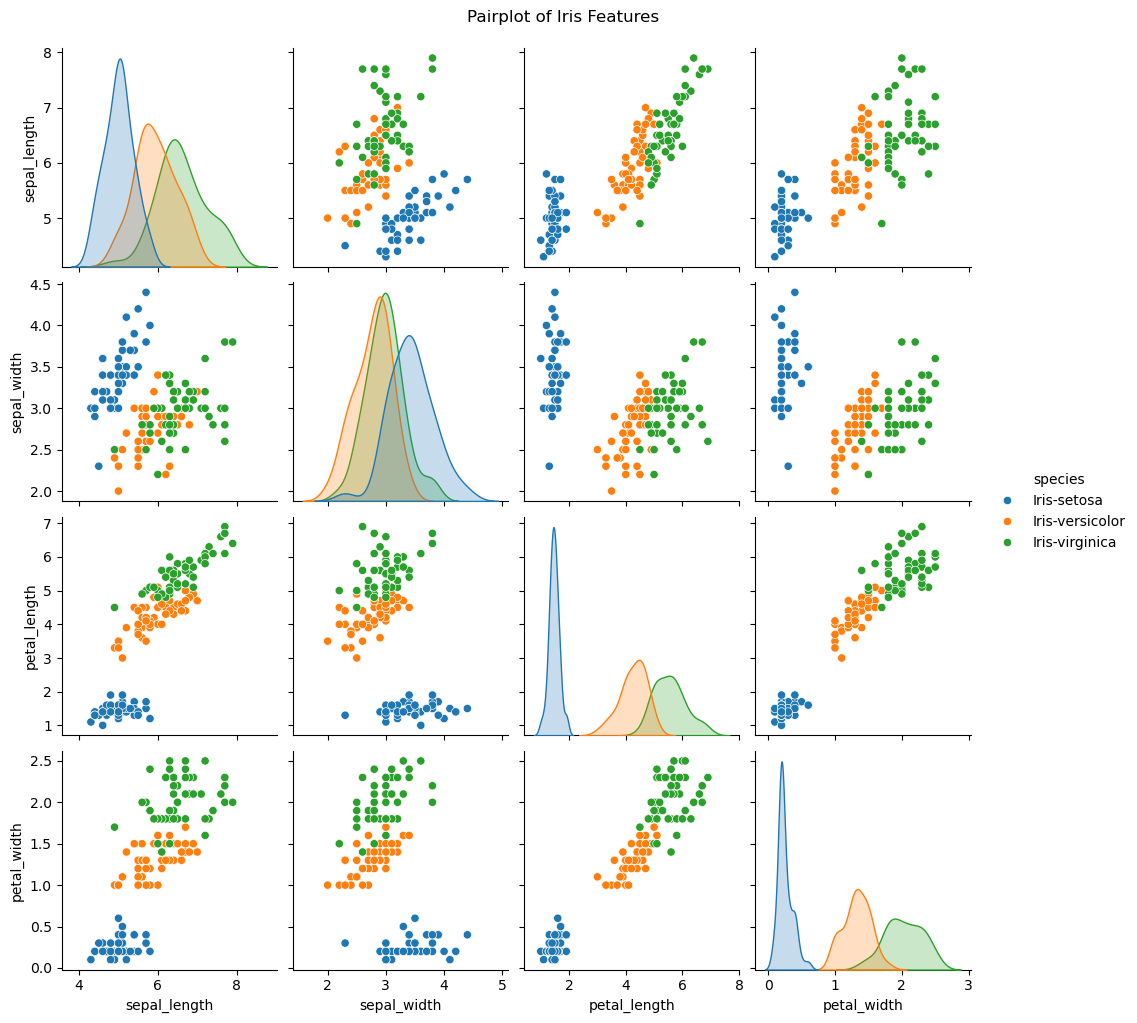

In [48]:
# Pairplot to visualize feature relationships
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


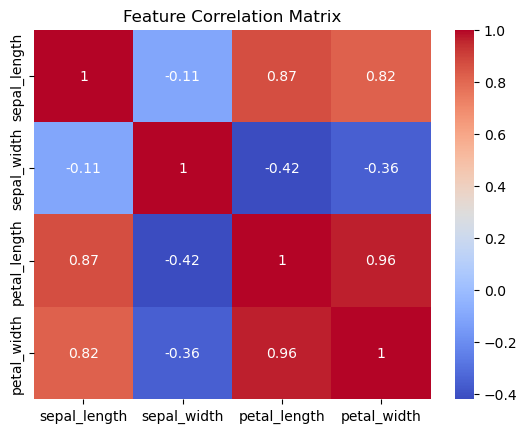

In [43]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
# Outlier Detection (Using IQR)
Q1 = df.iloc[:, :-1].quantile(0.25)
Q3 = df.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df.iloc[:, :-1] < (Q1 - 1.5 * IQR)) | (df.iloc[:, :-1] > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers per Feature:\n", outliers)


Outliers per Feature:
 sepal_length    0
sepal_width     4
petal_length    0
petal_width     0
dtype: int64


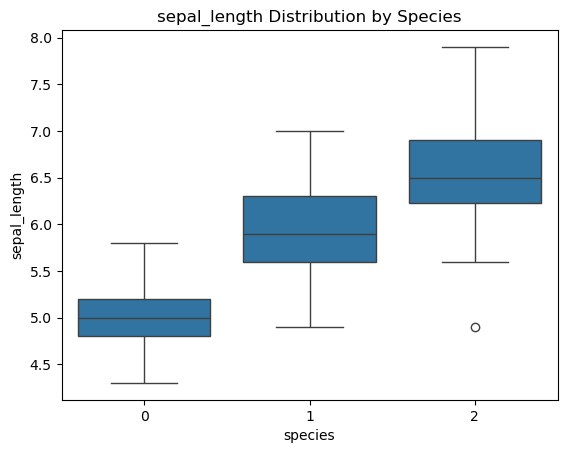

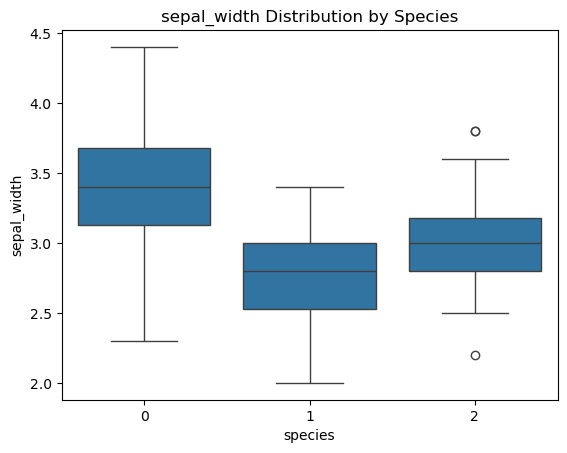

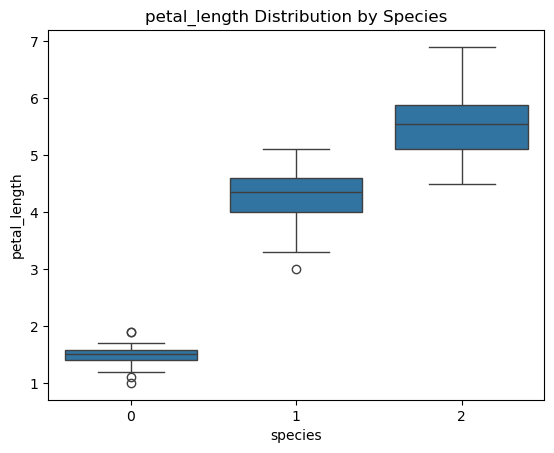

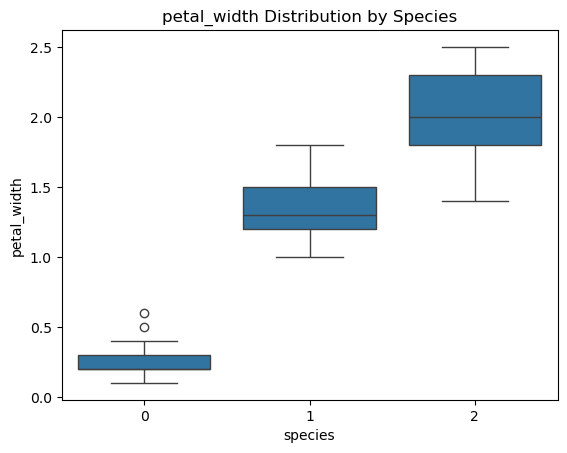

In [ ]:
# Boxplots for each feature
features = df.columns[:-1]
for col in features:
    sns.boxplot(x='species', y=col, data=df)
    plt.title(f'{col} Distribution by Species')
    plt.show()

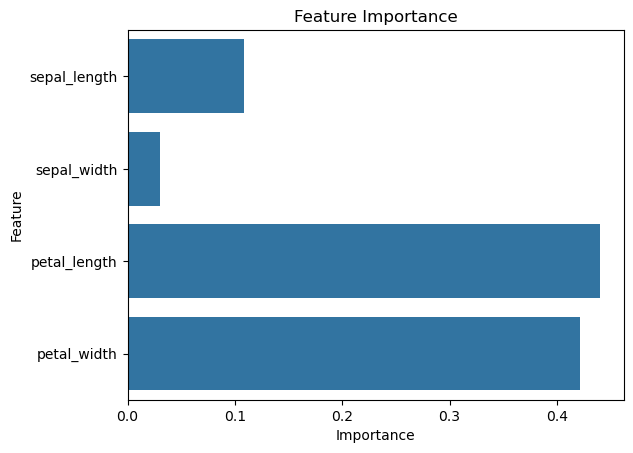

In [ ]:
# After fitting the model
importances = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [52]:
# Step 3: Encode target labels (species)
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species']) 
# df['Iris-setosa'] = label_encoder.fit_transform(df['Iris-setosa'])
# Converts to numerical labels
# Setosa → 0, Versicolor → 1, Virginica → 2

In [53]:
print(df['species'].unique())
print(df.dtypes)


[0 1 2]
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object


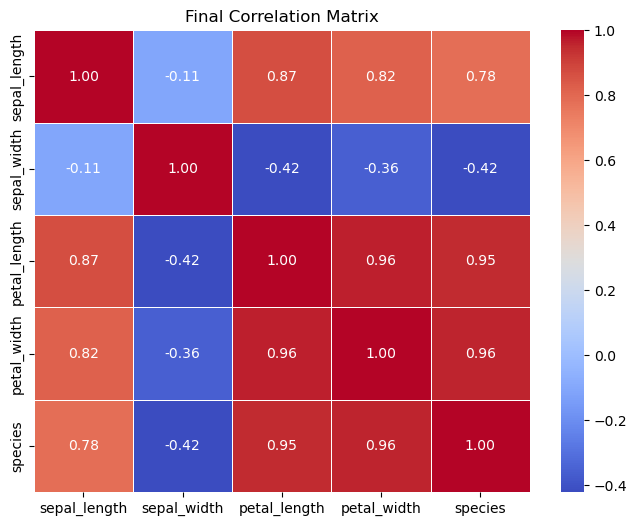

In [55]:
final_corr = df.corr() # after converting the species column into numerical
plt.figure(figsize=(8,6))
sns.heatmap(final_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Final Correlation Matrix")
plt.show()

In [ ]:
# Step 4: Split data into features and target
X = df.drop('species', axis=1)
# droping target variable from the training data
y = df['species']
# setting target varible

In [ ]:
# Step 5: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 80% for training and 20% for testing
# random_state ensures reproducibility(same ratio split)

In [ ]:
# Step 6: Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# trains the model using training data

RandomForestClassifier(random_state=42)

In [ ]:
# Step 7: Predict on test set
y_pred = model.predict(X_test)
# # Uses the trained model to predict the species for unseen flowers(test set)

In [ ]:
# Step 8: Evaluate the model
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


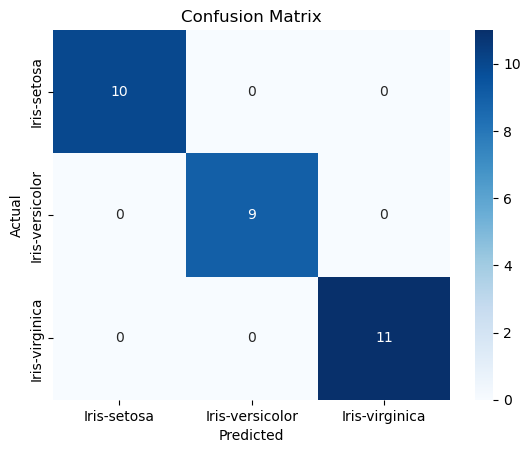

In [ ]:
# Step 9: Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Average CV score: 0.9666666666666668


- "On average, across all folds of cross-validation, the model classified ~96.67% of the flowers correctly."